# Ethan's notebook
Used for building additional visuals

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
print("import successful")

import successful


In [2]:
from eng_helper_code import *
print("import successful")

import successful


# Part 1 : Loading in Datasets

# Load National Survey on Drug Use and Health Datasets

In [3]:
NSDUH2018df = buildNSDUH2018df()
NSDUH2019df = buildNSDUH2019df()
NSDUH2021df = buildNSDUH2021df()
print(NSDUH2018df.head())
print(NSDUH2019df.head())
print(NSDUH2021df.head())

     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  worse_hopeless  \
0             5.0              5.0               5.0  ...             NaN   
1             4.0              5.0               5.0  ...             NaN   
2             2.0              3.0               3.0  ...             2.0   
3             4.0              5.0               5.0  ...             NaN   
4             5.0              5.0               5.0  ...             NaN   

   worse_depressed  worse_worthless  diff_concentration  diff_leavin

# Load Core Trends Datasets

In [4]:
coreTrends2018df = buildCoreTrends2018df()
coreTrends2019df = buildCoreTrends2019df()
coreTrends2021df = buildCoreTrends2021df()
print(coreTrends2018df.head())
print(coreTrends2019df.head())
print(coreTrends2021df.head())

   Web_Twitter  Web_Instagram  Web_Facebook  Web_Snapchat  Web_YouTube  \
0          2.0            1.0           1.0           1.0          1.0   
1          2.0            2.0           2.0           2.0          2.0   
3          2.0            2.0           1.0           2.0          2.0   
4          2.0            2.0           1.0           2.0          1.0   
5          1.0            2.0           1.0           2.0          1.0   

   Sns_Instagram  Sns_Facebook  Sns_Snapchat  Sns_YouTube  sex  age  
0            1.0           1.0           3.0          3.0    2   33  
1            NaN           NaN           NaN          NaN    2   76  
3            NaN           3.0           NaN          NaN    2   60  
4            NaN           3.0           NaN          2.0    1   55  
5            NaN           1.0           NaN          3.0    1   58  
   Web_Twitter  Web_Instagram  Web_Facebook  Web_Snapchat  Web_YouTube  \
0            2              2             1             2    

# Part 2 : Visual Graphs

# Graph 1: People by age and frequency of social media usage
This first shows people by age, and their frequency of social media usage.\
Each line shows the data from each year

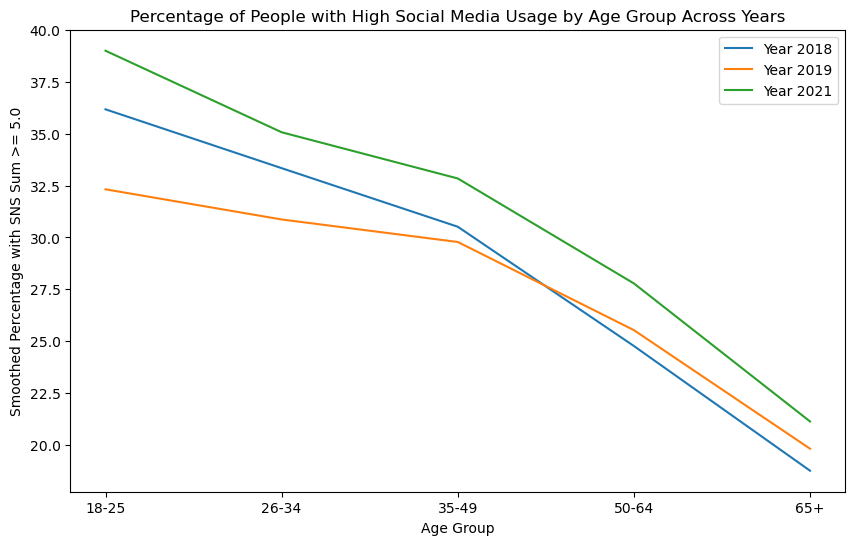

In [5]:
def snsPlot(df, year, ax):
    # Calculate the sum of all columns starting with 'Sns'
    sns_columns = df.filter(like='Sns_').columns
    sns_columns = sns_columns.drop('Sns_YouTube')  # Exclude Sns_YouTube from the analysis
    df['sns_sum'] = df[sns_columns].sum(axis=1, min_count=1)  # min_count=1 ensures NaN if all are NaN

    # Define age groups
    df['age_group'] = pd.cut(df['age'], bins=[0, 25, 34, 49, 64, float('inf')], labels=['18-25', '26-34', '35-49', '50-64', '65+'])
    
    # Determine the number of people with SNS sum >= 5.0 in each age group
    high_sns = df[df['sns_sum'] >= 5.0].groupby('age_group').size().reset_index(name='high_sns_count')

    # Calculate total people in each age group
    total_counts = df.groupby('age_group').size().reset_index(name='total')

    # Merge to get total counts in the high_sns DataFrame
    high_sns = pd.merge(high_sns, total_counts, on='age_group', how='right')

    # Fill NaN with 0 where there are no counts
    high_sns['high_sns_count'] = high_sns['high_sns_count'].fillna(0)

    # Calculate the percentage
    high_sns['percentage'] = (high_sns['high_sns_count'] / high_sns['total']) * 100

    # Optional: Apply a moving average for smoothing
    high_sns['smoothed_percentage'] = high_sns['percentage'].rolling(window=3, min_periods=1).mean()

    # Plot using seaborn on the given axis object
    sns.lineplot(data=high_sns, x='age_group', y='smoothed_percentage', ax=ax, label=f"Year {year}")

# Create a single figure and axis for all plots
fig, ax = plt.subplots(figsize=(10, 6))

# Call snsPlot for each DataFrame and year
snsPlot(coreTrends2018df, '2018', ax)
snsPlot(coreTrends2019df, '2019', ax)
snsPlot(coreTrends2021df, '2021', ax)

# Set titles and labels
plt.title('Percentage of People with High Social Media Usage by Age Group Across Years')
plt.xlabel('Age Group')
plt.ylabel('Smoothed Percentage with SNS Sum >= 5.0')
plt.legend()

# Show the plot
plt.show()

# Graph 2: People by Age and Mental health that affects social activities 
This second graph shows the percentage of people by age that have mental health issues that affect their social activities

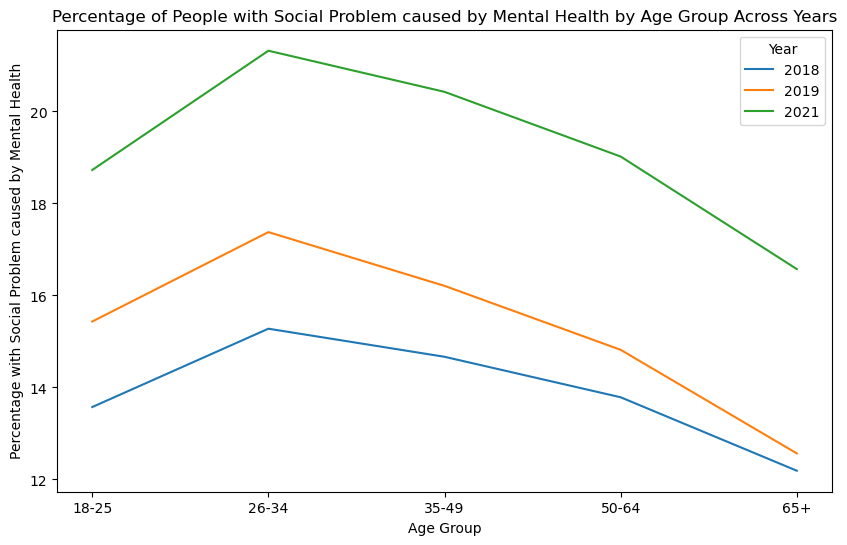

In [6]:
def diffSocialPlot(df, ax, label):
    # Determine if diff_social is 3 or higher
    df['diff_social_high'] = df['diff_social'] >= 3

    # Group by age and count how many meet the criteria
    group_counts = df.groupby('age')['diff_social_high'].sum()

    # Calculate total people in each age group
    total_counts = df.groupby('age').size()

    # Calculate the percentage
    percentages = (group_counts / total_counts) * 100

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Age Group': percentages.index,
        'Percentage': percentages.values
    })

    # Calculate moving average for smoothing (e.g., over 3 data points)
    plot_data['Moving Avg'] = plot_data['Percentage'].rolling(window=3, min_periods=1).mean()

    # Plot using seaborn with optional smoothing on the given axis
    sns.lineplot(data=plot_data, x='Age Group', y='Moving Avg', ax=ax, label=label)

# Create a single figure and axis for all plots
fig, ax = plt.subplots(figsize=(10, 6))

# Call diffSocialPlot for each DataFrame and year, using the same axis
diffSocialPlot(NSDUH2018df, ax, '2018')
diffSocialPlot(NSDUH2019df, ax, '2019')
diffSocialPlot(NSDUH2021df, ax, '2021')

# Set the title and labels, and show the legend
plt.title('Percentage of People with Social Problem caused by Mental Health by Age Group Across Years')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Social Problem caused by Mental Health')
plt.legend(title='Year')

# Show the plot
plt.show()

# Graph 3: Combining Graphs 1 and 2 to show a Correlation between Social Media Usage and Mental Health affecting Social Activities

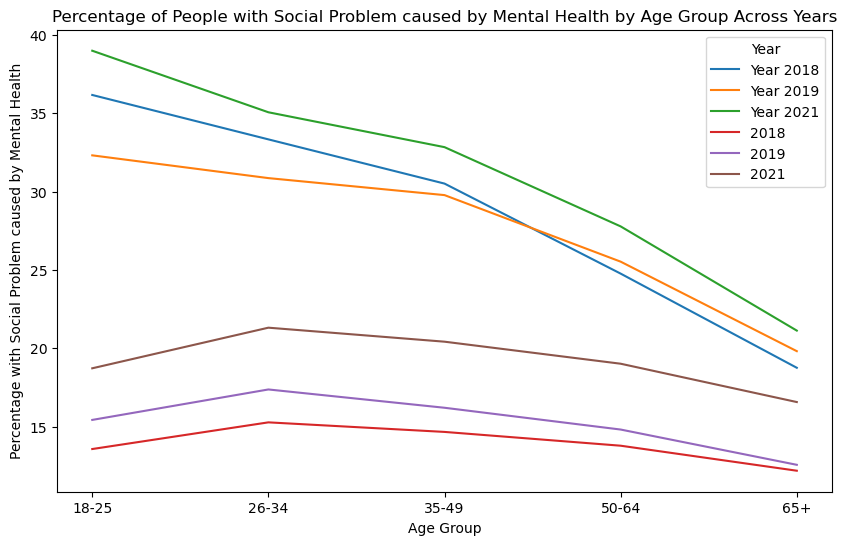

In [7]:
# Create a single figure and axis for all plots
fig, ax = plt.subplots(figsize=(10, 6))

# Call snsPlot for each DataFrame and year
snsPlot(coreTrends2018df, '2018', ax)
snsPlot(coreTrends2019df, '2019', ax)
snsPlot(coreTrends2021df, '2021', ax)

# Call diffSocialPlot for each DataFrame and year, using the same axis
diffSocialPlot(NSDUH2018df, ax, '2018')
diffSocialPlot(NSDUH2019df, ax, '2019')
diffSocialPlot(NSDUH2021df, ax, '2021')

# Set the title and labels, and show the legend
plt.title('Percentage of People with Social Problem caused by Mental Health by Age Group Across Years')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Social Problem caused by Mental Health')
plt.legend(title='Year')

# Show the plot
plt.show()

# Graph Alternatives

First combining all data sets, with a column which states the year

In [8]:
coreTrends2018df['year'] = "2018"
coreTrends2019df['year'] = "2019"
coreTrends2021df['year'] = "2021"

coreTrendsAlldf = pd.concat([coreTrends2018df, coreTrends2019df, coreTrends2021df])
print(coreTrendsAlldf.head())

   Web_Twitter  Web_Instagram  Web_Facebook  Web_Snapchat  Web_YouTube  \
0          2.0            1.0           1.0           1.0          1.0   
1          2.0            2.0           2.0           2.0          2.0   
3          2.0            2.0           1.0           2.0          2.0   
4          2.0            2.0           1.0           2.0          1.0   
5          1.0            2.0           1.0           2.0          1.0   

   Sns_Instagram  Sns_Facebook  Sns_Snapchat  Sns_YouTube  sex  age  sns_sum  \
0            1.0           1.0           3.0          3.0    2   33      5.0   
1            NaN           NaN           NaN          NaN    2   76      NaN   
3            NaN           3.0           NaN          NaN    2   60      3.0   
4            NaN           3.0           NaN          2.0    1   55      3.0   
5            NaN           1.0           NaN          3.0    1   58      1.0   

  age_group  year  
0     26-34  2018  
1       65+  2018  
3     50-64  2

In [9]:
NSDUH2018df['year'] = "2018"
NSDUH2019df['year'] = "2019"
NSDUH2021df['year'] = "2021"

NSDUHAlldf = pd.concat([NSDUH2018df, NSDUH2019df, NSDUH2021df])
print(NSDUHAlldf.head())

     age  sex  in_hospital  on_medication  school  like_school  self_group  \
0  35-49    2          2.0            2.0     NaN          NaN         NaN   
1  18-25    2          2.0            2.0     NaN          NaN         NaN   
2  18-25    2          2.0            2.0     NaN          NaN         NaN   
3  26-34    2          2.0            1.0     NaN          NaN         NaN   
4  26-34    1          2.0            2.0     NaN          NaN         NaN   

   nervous_last30  hopeless_last30  depressed_last30  ...  diff_concentration  \
0             5.0              5.0               5.0  ...                 NaN   
1             4.0              5.0               5.0  ...                 1.0   
2             2.0              3.0               3.0  ...                 4.0   
3             4.0              5.0               5.0  ...                 2.0   
4             5.0              5.0               5.0  ...                 NaN   

   diff_leaving_house  diff_strangers  diff_

# Graph 1b

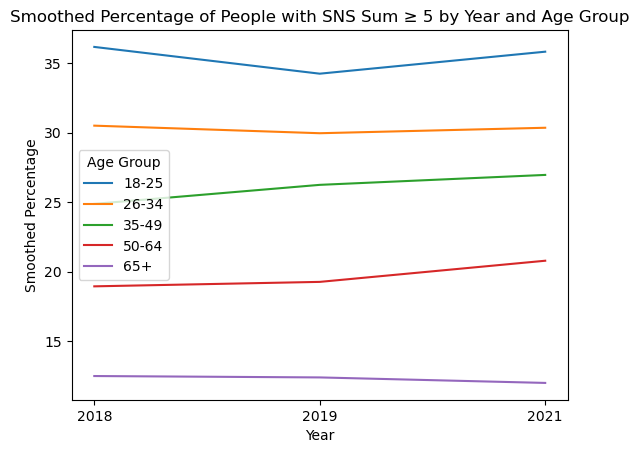

In [29]:
def snsAllPlot(df, window=3):
    # Calculating sns_sum only if it is not already calculated in your data
    if 'sns_sum' not in df.columns:
        sns_columns = df.filter(like='Sns_').columns
        sns_columns = sns_columns.drop('Sns_YouTube')
        df['sns_sum'] = df[sns_columns].sum(axis=1)

    # Grouping by year and age_group
    grouped = df.groupby(['year', 'age_group'])

    # Calculating the percentage of people with sns_sum >= 5
    percentage_df = grouped.apply(lambda x: (x['sns_sum'] >= 5).mean() * 100).reset_index()
    percentage_df.columns = ['year', 'age_group', 'percentage']

    # Sorting the data to ensure the rolling mean is applied correctly
    percentage_df.sort_values(by=['age_group', 'year'], inplace=True)

    # Calculating the moving average
    percentage_df['smoothed_percentage'] = percentage_df.groupby('age_group')['percentage'].rolling(window=window, min_periods=1).mean().reset_index(level=0, drop=True)

    # Plotting using the smoothed data
    sns.lineplot(x='year', y='smoothed_percentage', hue='age_group', data=percentage_df)
    plt.title('Smoothed Percentage of People with SNS Sum ≥ 5 by Year and Age Group')
    plt.xlabel('Year')
    plt.ylabel('Smoothed Percentage')
    plt.legend(title='Age Group')
    plt.show()

    
snsAllPlot(coreTrendsAlldf)

# Graph 2b

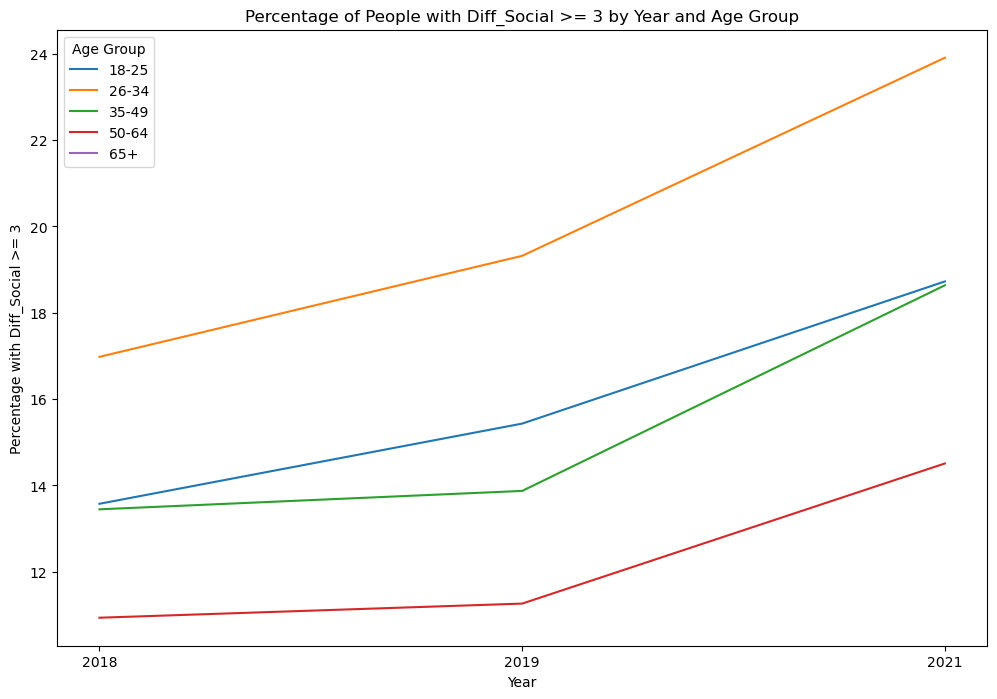

In [20]:
def diffSocialAllPlot(df):
    # Define a new column to check if diff_social is 3 or higher
    df['diff_social_high'] = df['diff_social'] >= 3

    # Group by year and age, calculate total and number meeting criteria
    grouped = df.groupby(['year', 'age']).agg(
        total=('diff_social_high', 'size'),
        high_social_count=('diff_social_high', 'sum')
    ).reset_index()

    # Calculate percentage
    grouped['percentage'] = (grouped['high_social_count'] / grouped['total']) * 100

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=grouped, x='year', y='percentage', hue='age')
    plt.title('Percentage of People with Diff_Social >= 3 by Year and Age Group')
    plt.xlabel('Year')
    plt.ylabel('Percentage with Diff_Social >= 3')
    plt.legend(title='Age Group')

    # Show the plot
    plt.show()

    
diffSocialAllPlot(NSDUHAlldf)